In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Import the three datasets
movies_df=pd.read_csv("movies.dat",delimiter="::",engine='python',names =['MovieID','Title','Genres'],header=None)
users_df=pd.read_csv("users.dat",delimiter="::",engine='python',names =['UserID','Gender','Age','Occupation','Zip-code'],header=None)
rating_df=pd.read_csv("ratings.dat",delimiter="::",engine='python',names =['UserID','MovieID','Rating','Timestamp'],header=None)

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [83]:
Master_data_int=pd.merge(movies_df,rating_df,on='MovieID',how='inner')
Master_data_full=pd.merge(Master_data_int,users_df,on='UserID',how='inner')
Master_data=Master_data_full[['MovieID','Title','UserID','Age','Gender','Occupation','Rating','Genres']]

In [84]:
Master_data.shape

(1000209, 8)

In [85]:
Master_data=Master_data.dropna()

In [86]:
Master_data.shape

(1000209, 8)

In [87]:
rating_df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [88]:
users_df['Age'].unique()

array([ 1, 56, 25, 45, 50, 35, 18], dtype=int64)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
<br>User Age Distribution

In [89]:
%matplotlib inline

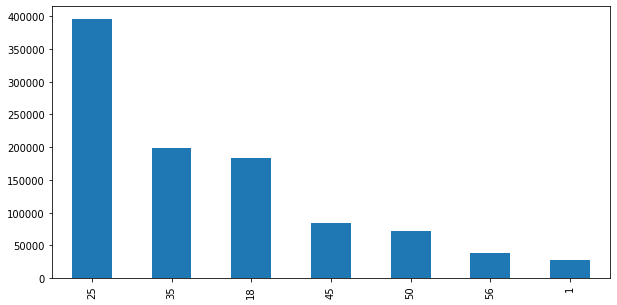

In [90]:
Master_data['Age'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

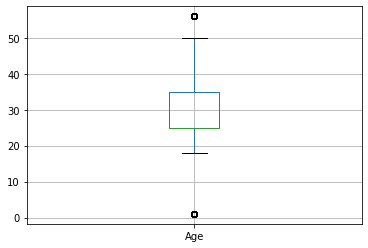

In [91]:
users_df[['Age']].boxplot()

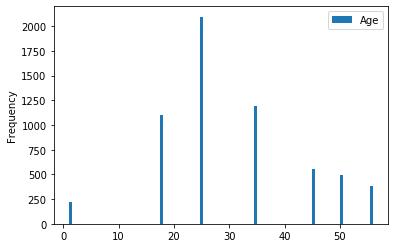

In [92]:
users_df[['Age']].plot(kind='hist',bins=100)

Text(0.5, 0, 'Age')

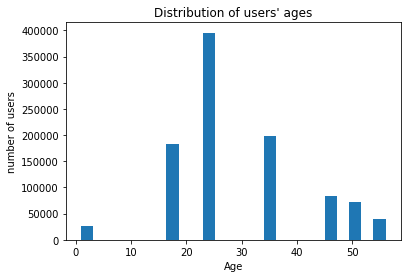

In [93]:
Master_data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('number of users')
plt.xlabel('Age')

User rating of the movie “Toy Story”

In [94]:
user_rating_toy_story = Master_data[Master_data.Title.str.contains('Toy Story')][['UserID','Title',
            'Rating']].groupby(['Title'])['Rating'].agg(['sum','count']).reset_index()
print(user_rating_toy_story)

                Title   sum  count
0    Toy Story (1995)  8613   2077
1  Toy Story 2 (1999)  6687   1585


In [95]:
user_rating_toy_story['Overall_Rating'] = (user_rating_toy_story['sum']/user_rating_toy_story['count']).round()
user_rating_toy_story.drop(columns='sum',axis=1,inplace=True)
user_rating_toy_story.rename(columns = {'count':'Number_of_votes'}, inplace=True)
print(user_rating_toy_story)

                Title  Number_of_votes  Overall_Rating
0    Toy Story (1995)             2077             4.0
1  Toy Story 2 (1999)             1585             4.0


Top 25 movies by viewership rating

In [96]:
group_rating = Master_data[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())

                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)           112               37   
1           'Night Mother (1986)           236               70   
2      'Til There Was You (1997)           140               52   
3             'burbs, The (1989)           882              303   
4  ...And Justice for All (1979)           739              199   

   Overall_rating  
0             3.0  
1             3.0  
2             3.0  
3             3.0  
4             4.0  


In [97]:
top_25_movies = group_rating.sort_values(by=['Overall_rating','Number_of_votes'],ascending = False)[['Title','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)

                                                Title  Overall_rating
0                             Schindler's List (1993)             5.0
1                    Shawshank Redemption, The (1994)             5.0
2                               Godfather, The (1972)             5.0
3                          Usual Suspects, The (1995)             5.0
4                          Wrong Trousers, The (1993)             5.0
5                               Close Shave, A (1995)             5.0
6   Seven Samurai (The Magnificent Seven) (Shichin...             5.0
7                                      Sanjuro (1962)             5.0
8                             Apple, The (Sib) (1998)             5.0
9                                     Lamerica (1994)             5.0
10                I Am Cuba (Soy Cuba/Ya Kuba) (1964)             5.0
11                 Gate of Heavenly Peace, The (1995)             5.0
12                               Smashing Time (1967)             5.0
13                  

**Find the ratings for all the movies reviewed by for a particular user of user id = 2696**

In [98]:
movie_list = Master_data[Master_data['UserID']==2696]['MovieID'].tolist()
movie_list

[350,
 800,
 1092,
 1097,
 1258,
 1270,
 1589,
 1617,
 1625,
 1644,
 1645,
 1711,
 1783,
 1805,
 1892,
 2338,
 2389,
 2713,
 3176,
 3386]

In [99]:
movies_for_2696 = Master_data[Master_data['MovieID'].isin(movie_list)][['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
movies_for_2696['Overall_rating'] = (movies_for_2696['sum']/movies_for_2696['count']).round()
movies_for_2696.drop(columns=['sum','count'],inplace=True)
print(movies_for_2696)

                                             Title  Overall_rating
0                        Back to the Future (1985)             4.0
1                            Basic Instinct (1992)             4.0
2                               Client, The (1994)             3.0
3                                  Cop Land (1997)             3.0
4                     Devil's Advocate, The (1997)             3.0
5                E.T. the Extra-Terrestrial (1982)             4.0
6                                 Game, The (1997)             4.0
7           I Know What You Did Last Summer (1997)             3.0
8     I Still Know What You Did Last Summer (1998)             2.0
9                                       JFK (1991)             4.0
10                        L.A. Confidential (1997)             4.0
11                              Lake Placid (1999)             3.0
12                                Lone Star (1996)             4.0
13  Midnight in the Garden of Good and Evil (1997)            

In [100]:
def user_age_new(age):
    if age <20:
        return 'Young'
    elif age <50:
        return 'Middle Age'
    else:
        return 'Senior'
users_df['Ages_short']=users_df['Age'].apply(user_age_new)
users_df['Ages_short'].unique()

array(['Young', 'Senior', 'Middle Age'], dtype=object)

In [101]:
Master_data.loc[Master_data['Age'] ==1, 'Age Group'] = 'Young'
Master_data.loc[Master_data['Age'] ==18, 'Age Group'] = 'Young'
Master_data.loc[Master_data['Age'] ==25, 'Age Group'] = 'Young'
Master_data.loc[Master_data['Age']==35, 'Age Group'] = 'Middle'
Master_data.loc[Master_data['Age'] ==45, 'Age Group'] = 'Midle'
Master_data.loc[Master_data['Age'] ==50, 'Age Group'] = 'Senior'
Master_data.loc[Master_data['Age']==56, 'Age Group'] = 'Senior'

In [102]:
movie_Genres_list = Master_data.Genres.tolist()
movie_Genres_list[0:10]

["Animation|Children's|Comedy",
 "Animation|Children's|Musical|Romance",
 'Drama',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Drama|War',
 "Children's|Drama",
 "Animation|Children's|Comedy|Musical",
 "Animation|Children's|Musical",
 "Animation|Children's|Musical",
 'Crime|Drama|Thriller']

In [103]:
movie_genre_list = []
i = 0
while(i<len(movie_Genres_list)):
    movie_genre_list+=movie_Genres_list[i].split('|')
    i+=1
movie_genre_list[0:10]  

['Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Musical',
 'Romance',
 'Drama',
 'Action',
 'Adventure']

In [104]:
movie_genre_uniq=set(movie_genre_list)
movie_genre_uniq

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [105]:
new_data = pd.concat([Master_data,Master_data.Genres.str.get_dummies()], axis=1)

In [106]:
print(new_data.columns)

Index(['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating',
       'Genres', 'Age Group', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [107]:
new_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres,Age Group,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy,Young,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,1,F,10,5,Animation|Children's|Musical|Romance,Young,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,1,F,10,5,Drama,Young,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,Action|Adventure|Fantasy|Sci-Fi,Young,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,1,F,10,5,Drama|War,Young,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
new_data.shape

(1000209, 27)

In [109]:
df = new_data.drop(columns=['Title','Genres'])
df.head()

,MovieID,UserID,Age,Gender,Occupation,Rating,Age Group,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,1,F,10,5,Young,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,1,1,F,10,5,Young,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,1,1,F,10,5,Young,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,1,1,F,10,4,Young,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,1,1,F,10,5,Young,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [110]:
df.Occupation.value_counts()
df.set_index('MovieID', inplace = True)

In [111]:
df.head()

,UserID,Age,Gender,Occupation,Rating,Age Group,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,1,F,10,5,Young,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
48,1,1,F,10,5,Young,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
150,1,1,F,10,5,Young,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,1,1,F,10,4,Young,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
527,1,1,F,10,5,Young,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
X = df.drop(columns=['Rating'])
Y = df['Rating']

In [113]:
X

,UserID,Age,Gender,Occupation,Age Group,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,1,F,10,Young,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
48,1,1,F,10,Young,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
150,1,1,F,10,Young,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,1,1,F,10,Young,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
527,1,1,F,10,Young,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,5727,25,M,4,Young,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3535,5727,25,M,4,Young,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3536,5727,25,M,4,Young,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [114]:
x1 = pd.get_dummies(data=X)
x2 = pd.get_dummies(X['Occupation'], prefix = 'Occupation')

In [115]:
x2

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3535,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3536,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X = pd.concat([x1,x2], axis=1)

In [117]:
X.columns

Index(['UserID', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Gender_F', 'Gender_M',
       'Age Group_Middle', 'Age Group_Midle', 'Age Group_Senior',
       'Age Group_Young', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20'],
      dtype='object')

In [120]:
X.drop(columns = ['Gender_F','Occupation_20'],
       axis = 1, inplace=True)

In [122]:
X.head()

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,1,10,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
48,1,1,10,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
150,1,1,10,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
260,1,1,10,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
527,1,1,10,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [123]:
XY = pd.concat([X,Y], axis=1)

In [125]:
XY.head()

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Rating
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,5
48,1,1,10,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
150,1,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
260,1,1,10,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
527,1,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [126]:
XY.corr()

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Rating
UserID,1.000000,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,...,-0.017747,-0.019506,-0.025539,0.020618,0.038164,0.002550,-0.001017,0.009982,-0.028945,0.012303
Age,0.034688,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,...,0.041097,-0.008086,0.228469,-0.006463,-0.001245,0.120101,0.049327,0.023818,-0.064772,0.056869
Occupation,-0.026698,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,-0.002689,...,0.065745,0.149490,0.089742,0.207488,0.163397,0.267783,0.384570,0.168718,0.206456,0.006753
Action,-0.002023,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,...,-0.008057,0.023721,-0.015068,0.009717,0.008802,0.000186,0.040320,0.001612,-0.002460,-0.047633
Adventure,-0.000683,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,...,-0.003949,0.017566,-0.005647,-0.000529,0.007397,-0.001813,0.024713,0.004900,-0.002423,-0.036718
Animation,-0.007665,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,...,-0.005680,0.004814,-0.011278,-0.008746,0.001037,-0.008887,0.002122,-0.006706,-0.004100,0.019670
Children's,-0.004862,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,...,-0.007489,-0.003746,-0.011832,-0.011859,-0.001971,-0.011182,0.000086,-0.003828,-0.000690,-0.039829
Comedy,-0.003651,-0.044046,-0.006149,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,...,0.002871,-0.006293,-0.010098,0.003771,-0.005732,-0.006175,-0.011291,-0.002612,0.002544,-0.039622
Crime,0.003469,-0.007931,0.002821,0.088519,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,-0.026243,...,0.004160,-0.001462,-0.003452,0.008152,-0.001139,-0.000702,0.001228,0.002295,0.000359,0.033446
Documentary,-0.001064,0.004407,-0.002689,-0.052565,-0.035109,-0.018991,-0.024901,-0.040697,-0.026243,1.000000,...,0.002257,-0.002647,-0.000656,-0.004407,-0.001621,0.003074,-0.008813,-0.002126,0.001317,0.028098


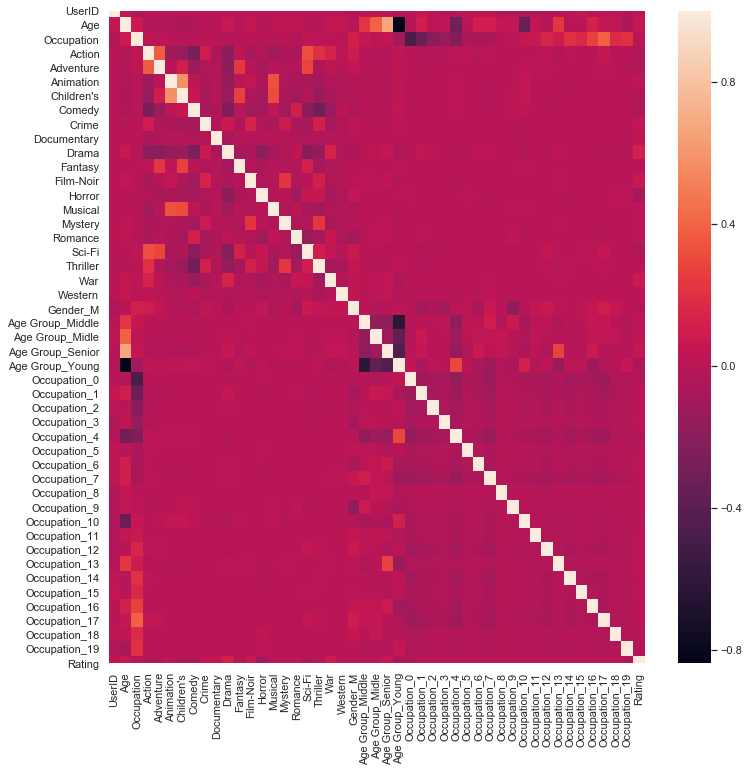

In [133]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(XY.corr())

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [136]:
X = X.values
Y = Y.values
train, test, train_labels, test_labels = train_test_split(X,Y,test_size=0.33,random_state=42)

In [138]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = accuracy_score(test_labels, Y_pred)*100
print(acc_decision_tree)

35.155376603073904


In [139]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
acc_random_forest = accuracy_score(test_labels, Y_pred)*100
print(acc_random_forest) #36 accuracy score

35.871893452581126


In [141]:
Logit_reg = LogisticRegression()
Logit_reg = Logit_reg.fit(train, train_labels)
predicted=Logit_reg.predict(test)
Logistic_reg_score=accuracy_score(test_labels, predicted)*100
print(Logistic_reg_score)

C:\Users\santa_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santa_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


34.96359852030939
